In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('data7_data3.npy')
re_data = data.reshape(-1, 100 * 100)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 50)
rr_data = pca.fit_transform(re_data)

In [3]:
pca.components_.shape

(50, 10000)

In [5]:
def f(data, r= 1):
    n = len(data)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize= (cols * r, rows * r))
    
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(data[i * 10 + j], cmap= 'gray_r')
            axs[i, j].axis('off')
            
    plt.show()

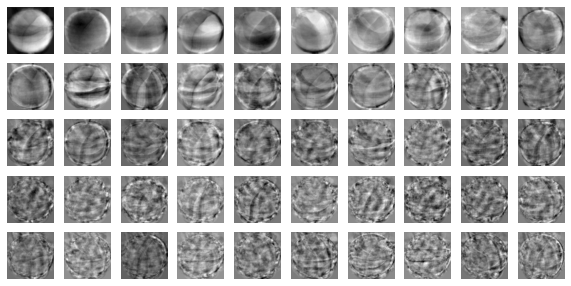

In [7]:
f(pca.components_.reshape(-1, 100, 100))

In [9]:
rr_data.shape

(300, 50)

In [11]:
k = pca.inverse_transform(rr_data).shape

In [16]:
np.sum(pca.explained_variance_ratio_)

0.9215697595658061

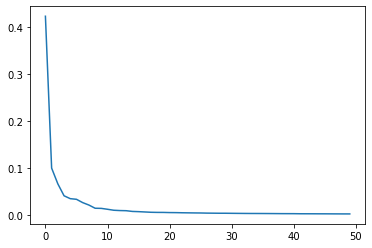

In [24]:
plt.plot(pca.explained_variance_ratio_)

In [26]:
y = np.array([0] * 100 + [1] * 100 + [2] * 100)
x = rr_data

In [27]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()

from sklearn.model_selection import cross_validate
sc = cross_validate(m, x, y, cv= 5)
np.mean(sc['test_score']), np.mean(sc['fit_time'])

(1.0, 0.03204512596130371)